<a href="https://colab.research.google.com/github/ne-adrita/Predicting-Sleep-Quality-through-Behavioral-Pattern-Recognition/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 SVR - Regression Evaluation
MAE: 2.5001067670382318
MSE: 8.555949395991494
R² Score: -0.05396092536142283

📊 SVC - Classification Evaluation
Accuracy: 0.387
Classification Report:
               precision    recall  f1-score   support

        Poor       0.40      0.81      0.54       394
     Average       0.37      0.13      0.19       310
        Good       0.29      0.09      0.14       296

    accuracy                           0.39      1000
   macro avg       0.35      0.34      0.29      1000
weighted avg       0.36      0.39      0.31      1000

Confusion Matrix:
 [[319  35  40]
 [244  41  25]
 [233  36  27]]


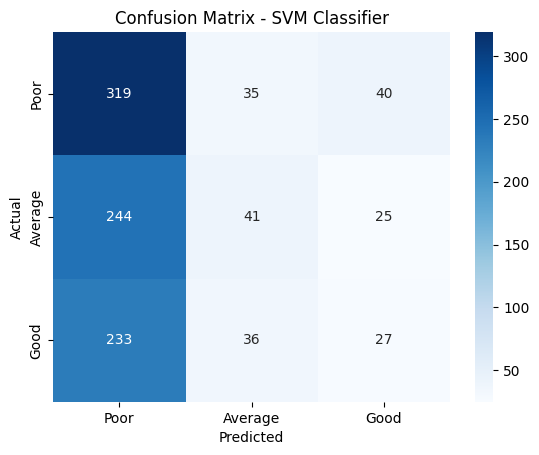

In [2]:
# 📌 Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR, SVC
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Step 2: Load dataset
df = pd.read_csv('/content/sleep_pattern_analysis_datasett.csv')

# 🧹 Step 3: Data cleaning
df.drop('Person_ID', axis=1, inplace=True)
df['Work Hours (hrs/day)'] = pd.to_numeric(df['Work Hours (hrs/day)'], errors='coerce')
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.dropna(inplace=True)

# 🎯 Step 4: Feature-target split
X = df.drop('Sleep Quality', axis=1)
y = df['Sleep Quality']

# ⚖ Step 5: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 🧠 Step 6A: SVM Regression (SVR)
# -------------------------------
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf')  # You can try 'linear', 'poly', etc.
svr_model.fit(X_train_r, y_train_r)
y_pred_r = svr_model.predict(X_test_r)

print("📊 SVR - Regression Evaluation")
print("MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R² Score:", r2_score(y_test_r, y_pred_r))

# -------------------------------
# 🧠 Step 6B: SVM Classification (SVC)
# -------------------------------
# Convert to categories: 0 = Poor, 1 = Average, 2 = Good
y_class = y.apply(lambda x: 0 if x <= 4 else (1 if x <= 7 else 2))

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

svc_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF is default and effective
svc_model.fit(X_train_c, y_train_c)
y_pred_c = svc_model.predict(X_test_c)

print("\n📊 SVC - Classification Evaluation")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("Classification Report:\n", classification_report(y_test_c, y_pred_c, target_names=["Poor", "Average", "Good"]))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

# 🔍 Confusion Matrix Plot
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=["Poor", "Average", "Good"],
            yticklabels=["Poor", "Average", "Good"])
plt.title("Confusion Matrix - SVM Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
